In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor, MLPClassifier

from sklearn.metrics import mean_squared_error

In [0]:
# gen data
np.random.seed(2)
X = np.arange(-1,1,0.05)
m = X.shape[0]

y = 7*X**2 - 5*X + 2 + 4*np.random.rand(m,)

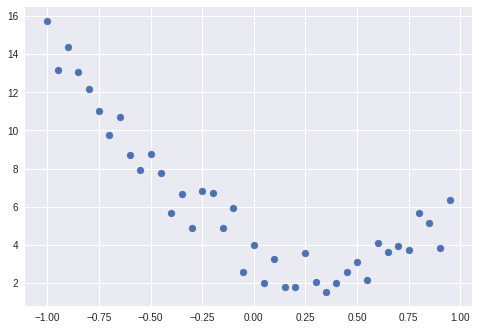

In [48]:
# plot data
plt.scatter(X,y)

In [49]:
# define model
net = MLPRegressor(hidden_layer_sizes=(30,20), max_iter=1000)

print(net)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


In [50]:
# fit data to model
X = X.reshape(-1,1)
net.fit(X, y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [51]:
# evaluate error
y_hat = net.predict(X)
err = mean_squared_error(y_hat, y)
print("Error on training: ", err)

Error on training:  0.8508554084743768


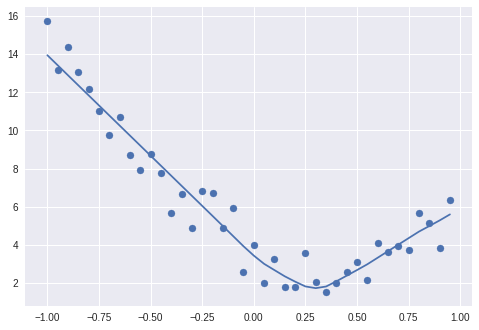

In [52]:
# plot regression line

plt.scatter(X,y)
plt.plot(X,y_hat)

In [0]:
np.random.seed(2)

# generate data, X is training data and y is training label
mean = [[1,1], [1,5],[5,1]]
cov = [[1,0],[0,1]]

n_classes = 3
num_each_class = 10
m = num_each_class * n_classes
n_features = 2

# generate data of class 0
X0 = np.random.multivariate_normal(mean[0], cov, num_each_class)
y0 = np.zeros((num_each_class,1))

# generate data of class 1
X1 = np.random.multivariate_normal(mean[1], cov, num_each_class)
y1 = np.ones((num_each_class,1))

# generate data of class 2
X2 = np.random.multivariate_normal(mean[2], cov, num_each_class)
y2 = np.array([2]*num_each_class).reshape(-1,1)

# concatenate data of the three classes
X = np.vstack([X0, X1, X2])
y = np.vstack([y0,y1,y2])

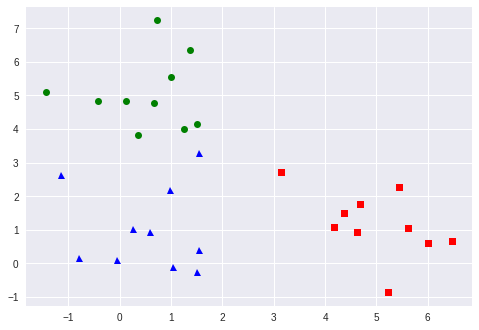

In [24]:
# plot data of 2 classes

# plot data of class 0
plt.plot(X0[:,0], X0[:,1], 'b^')

# plot data of class 1
plt.plot(X1[:,0], X1[:,1], 'go')

# plot data of class 2
plt.plot(X2[:,0], X2[:,1], 'rs')

In [27]:
# difine neural net classifier model
classifier = MLPClassifier(hidden_layer_sizes=(30), max_iter=1000)
print(classifier)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=30, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


In [28]:
# fit data to model
classifier.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=30, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [29]:
# evaluate accuracy
acc = classifier.score(X,y)
print("Accuracy: ", acc)

Accuracy:  1.0


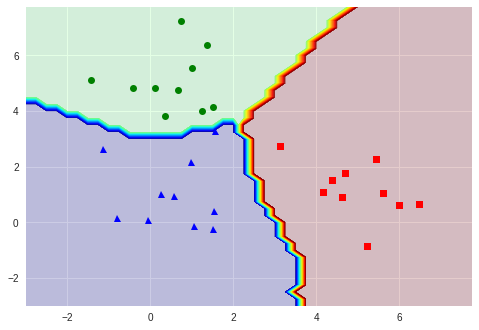

In [30]:
def plot_contour():
  # plot data of 2 classes

  # plot data of class 0
  plt.plot(X0[:,0], X0[:,1], 'b^')

  # plot data of class 1
  plt.plot(X1[:,0], X1[:,1], 'go')

  # plot data of class 2
  plt.plot(X2[:,0], X2[:,1], 'rs')

  x1_plot = np.arange(-3, 8, 0.25)
  x2_plot = np.arange(-3, 8, 0.25)

  xx1, xx2 = np.meshgrid(x1_plot, x2_plot)
  #print(xx)
  x1 = np.reshape(xx1,(xx1.shape[0]*xx1.shape[1],1))
  x2 = np.reshape(xx2,(xx2.shape[0]*xx2.shape[1],1))

  _X = np.append(x1,x2,axis=1)
  
  z = classifier.predict(_X)

  z = np.reshape(z, (len(x1_plot), len(x2_plot)))

  h = plt.contourf(x1_plot,x2_plot,z,200, cmap='jet',  alpha=.2)
  
plot_contour()